# **Cervical Cancer Risk Classification**

In [1]:
import pandas as pd
import numpy as np
import math

In [2]:
df = pd.read_csv("Dataset\kag_risk_factors_cervical_cancer.csv")

# **Data preprocessing**

In [3]:
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [5]:
df = df.replace('?', pd.NA)
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,<NA>,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [6]:
df = df.apply(pd.to_numeric)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

In [7]:
df.drop(['STDs: Time since first diagnosis','STDs: Time since last diagnosis'],inplace=True,axis=1)
print(df.shape)

(858, 34)


In [8]:
numerical_df = ['Age', 'Number of sexual partners', 'First sexual intercourse','Num of pregnancies', 'Smokes (years)',
                'Smokes (packs/year)','Hormonal Contraceptives (years)','IUD (years)','STDs (number)']
categorical_df = ['Smokes','Hormonal Contraceptives','IUD','STDs','STDs:condylomatosis','STDs:cervical condylomatosis',
                  'STDs:vaginal condylomatosis','STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
                  'STDs:pelvic inflammatory disease', 'STDs:genital herpes','STDs:molluscum contagiosum', 'STDs:AIDS', 
                  'STDs:HIV','STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis','Dx:Cancer', 'Dx:CIN', 
                  'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller','Citology', 'Biopsy']
category_df = ['Hinselmann', 'Schiller','Citology', 'Biopsy']

In [9]:
for feature in numerical_df:
    print(feature,'',df[feature].mean())
    feature_mean = round(df[feature].mean(),1)
    df[feature] = df[feature].fillna(feature_mean)
    

Age  26.82051282051282
Number of sexual partners  2.527644230769231
First sexual intercourse  16.995299647473562
Num of pregnancies  2.275561097256858
Smokes (years)  1.219721412585799
Smokes (packs/year)  0.4531439506492308
Hormonal Contraceptives (years)  2.2564192013893334
IUD (years)  0.5148043184885289
STDs (number)  0.17662682602921648


In [10]:
# to more acc.
for feature in categorical_df:
    print(feature, df[feature].mode()[0])
    feature_mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(feature_mode)

Smokes 0.0
Hormonal Contraceptives 1.0
IUD 0.0
STDs 0.0
STDs:condylomatosis 0.0
STDs:cervical condylomatosis 0.0
STDs:vaginal condylomatosis 0.0
STDs:vulvo-perineal condylomatosis 0.0
STDs:syphilis 0.0
STDs:pelvic inflammatory disease 0.0
STDs:genital herpes 0.0
STDs:molluscum contagiosum 0.0
STDs:AIDS 0.0
STDs:HIV 0.0
STDs:Hepatitis B 0.0
STDs:HPV 0.0
STDs: Number of diagnosis 0
Dx:Cancer 0
Dx:CIN 0
Dx:HPV 0
Dx 0
Hinselmann 0
Schiller 0
Citology 0
Biopsy 0


In [11]:
df = pd.get_dummies(df, columns=['Smokes', 'Hormonal Contraceptives', 'IUD', 'STDs'])

df.drop(['Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives (years)', 'IUD (years)',
         'STDs (number)', 'STDs:condylomatosis', 'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
         'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis', 'STDs:pelvic inflammatory disease',
         'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis B',
         'STDs:HPV'], inplace=True, axis=1)


In [12]:
numerical_visualisation_df = ['Age', 'Number of sexual partners', 'First sexual intercourse','Num of pregnancies']
categorical_visualisation_df = ['Smokes','Hormonal Contraceptives','IUD','STDs', 'STDs: Number of diagnosis','Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller','Citology', 'Biopsy']
category_visualisation_df = ['Hinselmann', 'Schiller','Citology', 'Biopsy']

In [13]:
df.to_csv("Dataset\kag_risk_factors_cervical_cancer_preprocessed.csv", index=False)

# **Data visualisation**

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

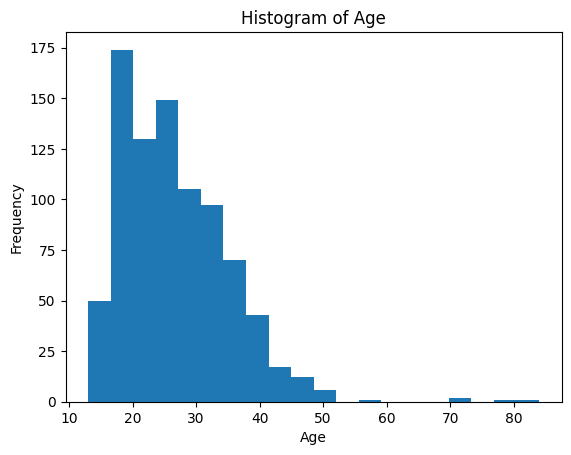

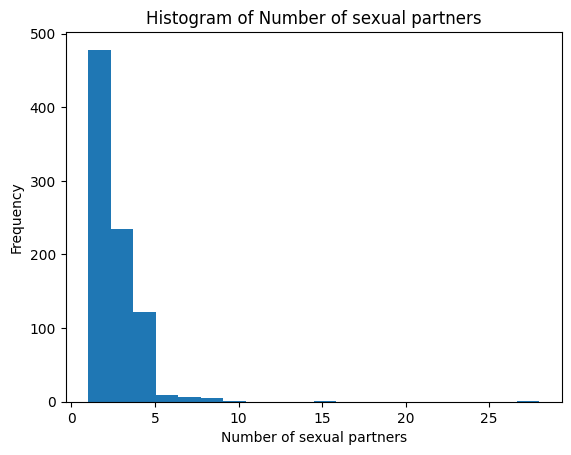

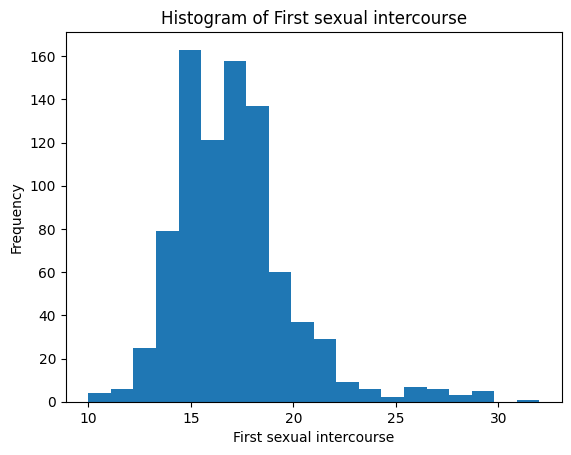

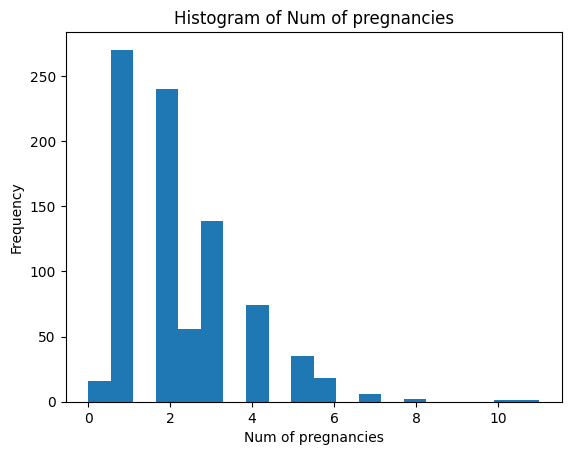

In [15]:
for feature in numerical_visualisation_df:
    plt.hist(df[feature], bins=20)
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.title(f"Histogram of {feature}")
    plt.show()

Mean age of the Women facing the risk of Cervical cancer 26.82051282051282


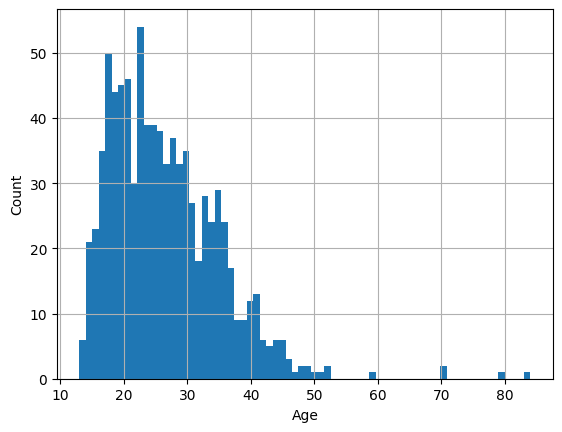

In [16]:
df['Age'].hist(bins=70)
plt.xlabel('Age')
plt.ylabel('Count')
print('Mean age of the Women facing the risk of Cervical cancer',df['Age'].mean())

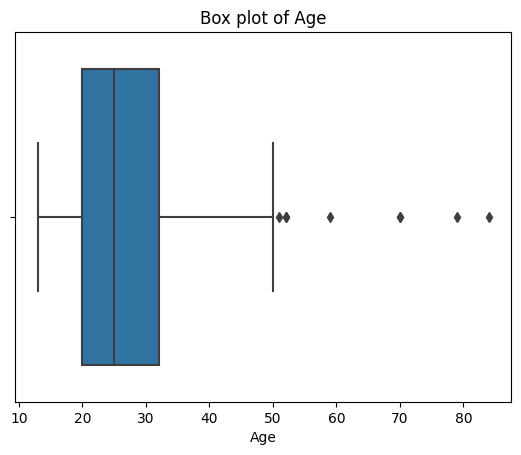

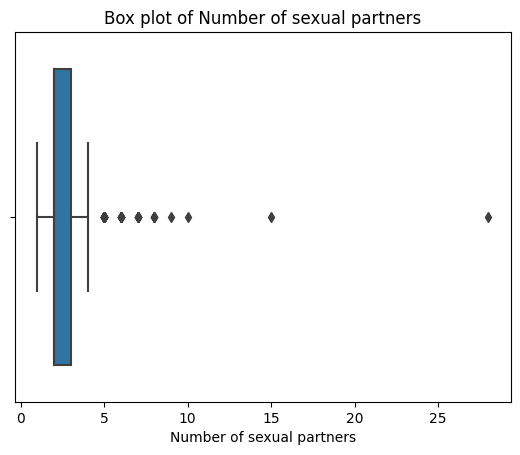

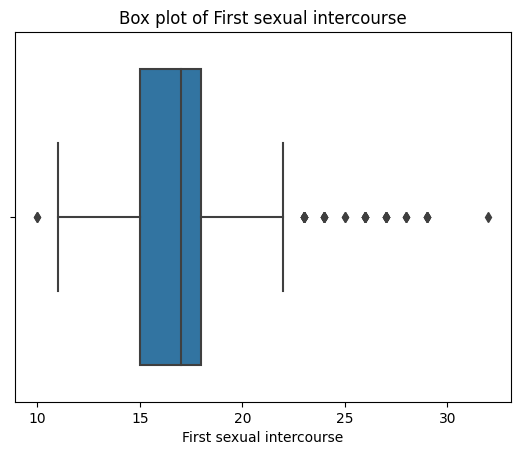

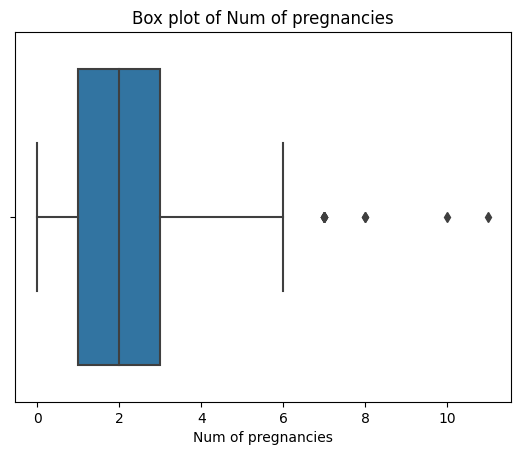

In [17]:
# Numerical Variables - Box plots
numerical_visualisation_df = ['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies']
for feature in numerical_visualisation_df:
    sns.boxplot(x=df[feature])
    plt.xlabel(feature)
    plt.title(f"Box plot of {feature}")
    plt.show()

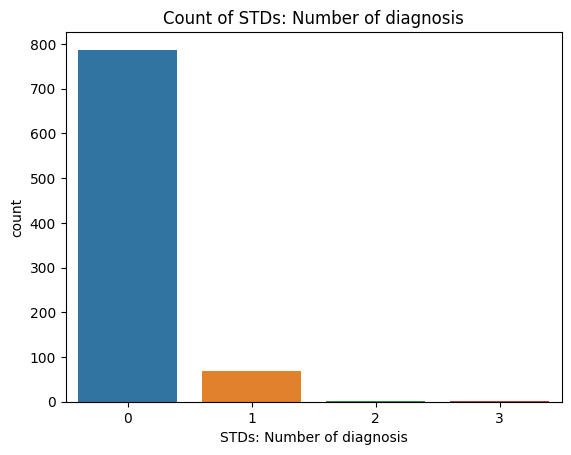

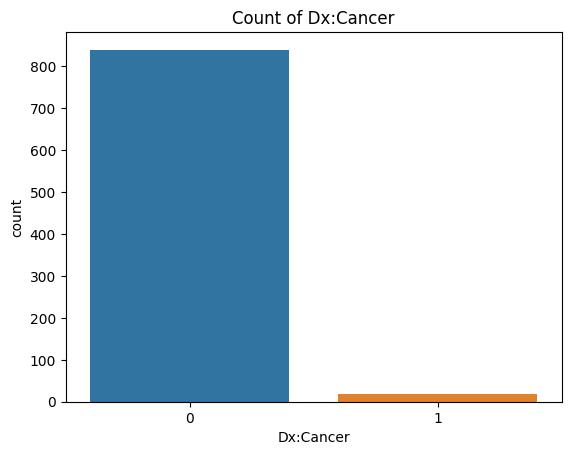

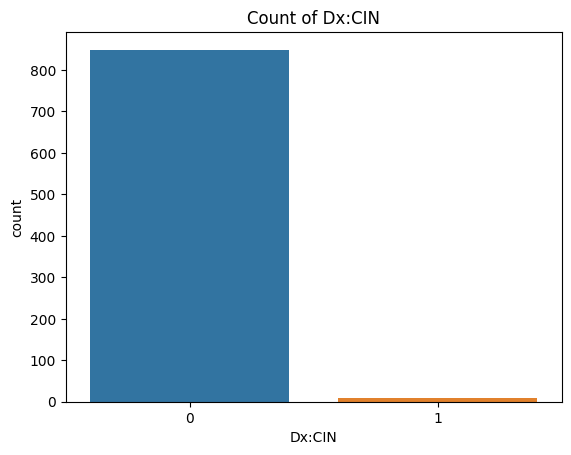

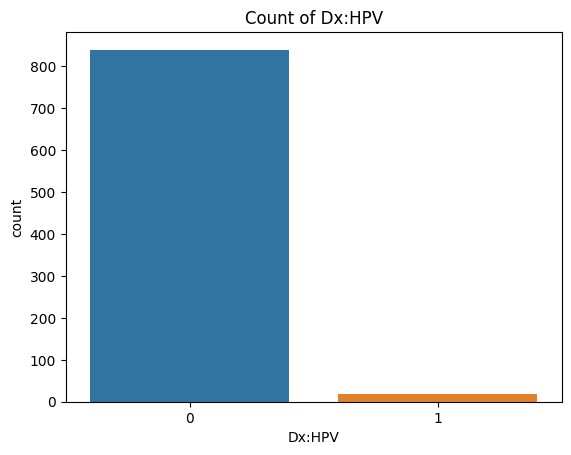

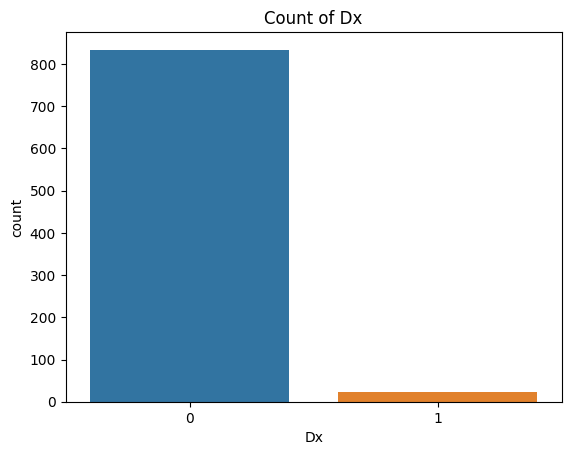

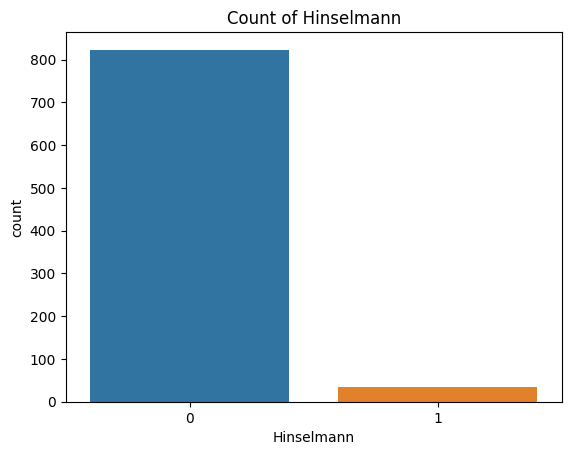

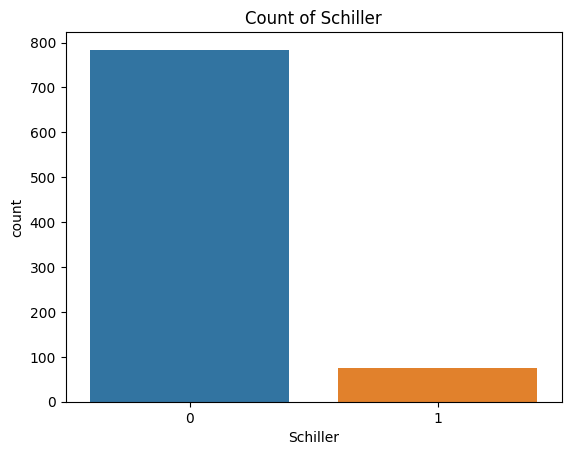

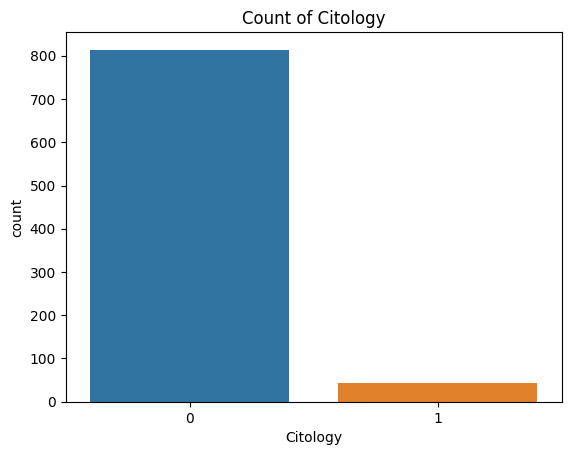

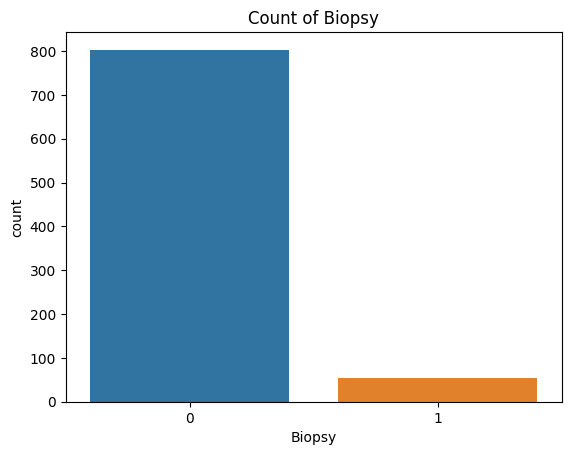

In [18]:
# Categorical Variables - Count plots
categorical_visualisation_df = [ 'STDs: Number of diagnosis',
                                'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy']
for feature in categorical_visualisation_df:
    sns.countplot(x=feature, data=df)
    plt.title(f"Count of {feature}")
    plt.show()

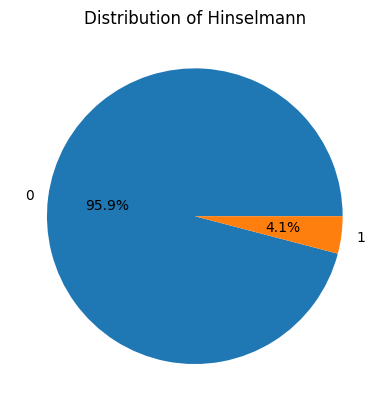

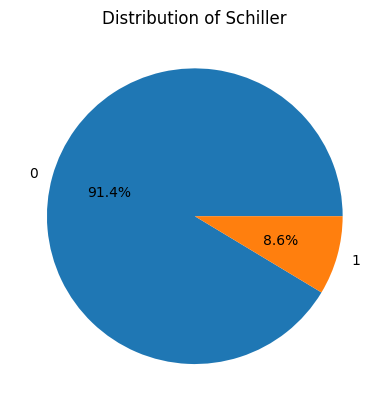

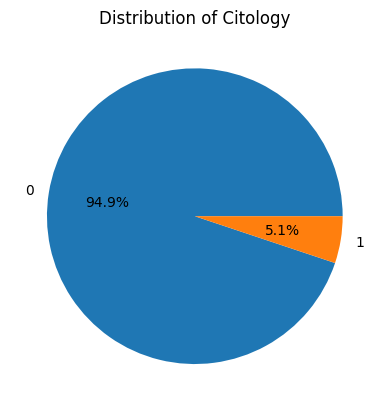

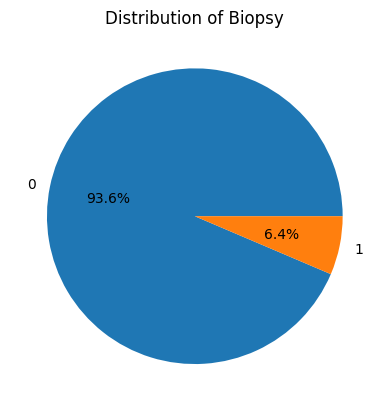

In [19]:
# Category Variables - Pie charts
category_visualisation_df = ['Hinselmann', 'Schiller', 'Citology', 'Biopsy']
for feature in category_visualisation_df:
    counts = df[feature].value_counts()
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
    plt.title(f"Distribution of {feature}")
    plt.show()

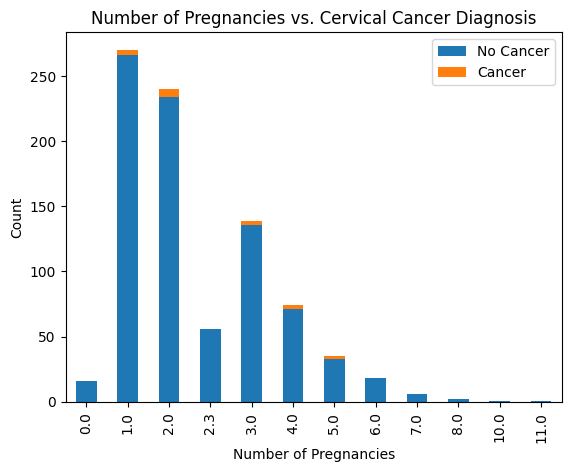

In [20]:
# Plot number of pregnancies vs. cervical cancer diagnosis
pregnancies_cancer = df.groupby(['Num of pregnancies', 'Dx:Cancer'])['Num of pregnancies'].count().unstack('Dx:Cancer')
pregnancies_cancer.plot(kind='bar', stacked=True)
plt.xlabel('Number of Pregnancies')
plt.ylabel('Count')
plt.title('Number of Pregnancies vs. Cervical Cancer Diagnosis')
plt.legend(['No Cancer', 'Cancer'])
plt.show()

# **Classification models**

In [21]:
df_features = df.drop(['Hinselmann', 'Schiller','Citology', 'Biopsy'],axis=1)
df_labels = df[['Hinselmann', 'Schiller','Citology', 'Biopsy']]
print(df_features.shape)
print(df_labels.shape)

(858, 17)
(858, 4)


In [22]:
df_features.columns.tolist()

['Age',
 'Number of sexual partners',
 'First sexual intercourse',
 'Num of pregnancies',
 'STDs: Number of diagnosis',
 'Dx:Cancer',
 'Dx:CIN',
 'Dx:HPV',
 'Dx',
 'Smokes_0.0',
 'Smokes_1.0',
 'Hormonal Contraceptives_0.0',
 'Hormonal Contraceptives_1.0',
 'IUD_0.0',
 'IUD_1.0',
 'STDs_0.0',
 'STDs_1.0']

In [23]:
df_labels.columns.tolist()

['Hinselmann', 'Schiller', 'Citology', 'Biopsy']

**Base Classification models**

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import joblib
from joblib import dump, load
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

models = []
models.append(('lr', LogisticRegression()))
models.append(('svm_model',SVC()))
models.append(('clf',GaussianNB()))
models.append(('Dt_model',DecisionTreeClassifier()))
models.append(('knn_model',KNeighborsClassifier()))
models.append(('rf_model',RandomForestClassifier()))

over_sampling_methods = [
    ('smote', SMOTE()),
]

under_sampling_methods = [
    ('random_under', RandomUnderSampler()),
]

k_best = SelectKBest(score_func=chi2, k=10)
with open('Results\output_models.txt', 'w') as f:
    for column in df_labels.columns:
        sm = SMOTE(random_state=42)
        df_features_res, df_labels_res = sm.fit_resample(df_features, df_labels[column])
        X_train, X_test, y_train, y_test = train_test_split(df_features_res, df_labels_res, test_size=0.25, random_state=42)
        
        for model in models:
            pipeline = Pipeline([
            ('over_sampling', SMOTE()),
            ('under_sampling', RandomUnderSampler()),
            ('k_best', k_best),
            ('model', model[1])
            ])
            pipeline.fit(X_train, y_train)
            y_pred = pipeline.predict(X_test)
            RF_Norm = pipeline
            
            y_true_col = y_test
            y_pred_col = y_pred
            acc = accuracy_score(y_true_col, y_pred_col)
            precision = precision_score(y_true_col, y_pred_col)
            recall = recall_score(y_true_col, y_pred_col)
            f1 = f1_score(y_true_col, y_pred_col)
            roc_auc = roc_auc_score(y_true_col, y_pred_col)
            
            if (column == 'Biopsy'):
                # save the model
                model_name = f"Results\{model}_{column}_model.pkl"
                joblib.dump(pipeline, model_name)
                
                f.write(f"For model {model}:\n")
                f.write(f"For column {column}:\n")
                f.write(f"Accuracy: {acc:.4f}\n")
                f.write(f"Precision: {precision:.4f}\n")
                f.write(f"Recall: {recall:.4f}\n")
                f.write(f"F1-score: {f1:.4f}\n")
                f.write(f"ROC AUC score: {roc_auc:.4f}\n\n")

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


**Hyperparameters Classification models**

In [25]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune for each model
lr_params = {'penalty': ['l1', 'l2'], 'C': [0.1, 1, 10]}
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
nb_params = {'var_smoothing': [1e-9, 1e-8, 1e-7]}
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, None]}
dt_params = {'criterion': ['gini', 'entropy'], 'max_depth': [5, 10, None]}
knn_params = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}

# Define models and their corresponding parameter grids
models = []
models.append(('lr', LogisticRegression(), lr_params))
models.append(('svm_model',SVC(), svm_params))
models.append(('clf',GaussianNB(), nb_params))
models.append(('rf_model',RandomForestClassifier(), rf_params))
models.append(('Dt_model',DecisionTreeClassifier(), dt_params))
models.append(('knn_model',KNeighborsClassifier(), knn_params))



with open('Results\output_hyperparameters.txt', 'w') as f:
    for column in df_labels.columns:
        
        sm = SMOTE(random_state=42)
        df_features_res, df_labels_res = sm.fit_resample(df_features, df_labels[column])
        X_train, X_test, y_train, y_test = train_test_split(df_features_res, df_labels_res, test_size=0.25, random_state=42)
        # Apply SMOTE to balance the classes
        pipeline = Pipeline(steps=[('over', SMOTE()), ('under', RandomUnderSampler())])
        X_train, y_train = pipeline.fit_resample(X_train, y_train)
        
        for model_name, model, params in models:
            
            grid_search = GridSearchCV(model, params, cv=5)
            grid_search.fit(X_train, y_train)
            best_params = grid_search.best_params_
            
            # Re-train the model using the best hyperparameters
            best_model = model.set_params(**best_params)
            best_model.fit(X_train, y_train)
            y_pred = best_model.predict(X_test)
            
            y_true_col = y_test
            y_pred_col = y_pred
            acc = accuracy_score(y_true_col, y_pred_col)
            precision = precision_score(y_true_col, y_pred_col)
            recall = recall_score(y_true_col, y_pred_col)
            f1 = f1_score(y_true_col, y_pred_col)
            roc_auc = roc_auc_score(y_true_col, y_pred_col)
            
            f.write(f"Results for {model_name} model and {column} column:\n")
            f.write(f"Best hyperparameters: {best_params}\n")
            f.write(f"Accuracy: {acc:.4f}\n")
            f.write(f"Precision: {precision:.4f}\n")
            f.write(f"Recall: {recall:.4f}\n")
            f.write(f"F1-score: {f1:.4f}\n")
            f.write(f"ROC AUC score: {roc_auc:.4f}\n\n")


c:\Users\youse\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\youse\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

**Hypermodel Classification models**

In [26]:
from sklearn.ensemble import StackingClassifier, BaggingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from mlxtend.classifier import StackingCVClassifier

models = []
models.append(('lr', LogisticRegression()))
models.append(('svm_model',SVC()))
models.append(('clf',GaussianNB()))
models.append(('rf_model',RandomForestClassifier()))
models.append(('Dt_model',DecisionTreeClassifier()))
models.append(('knn_model',KNeighborsClassifier()))

# Define ensemble methods
ensemble_methods = {
    'stacking': StackingClassifier(estimators=models, final_estimator=LogisticRegression()),
    'bagging': BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100),
    'adaboost': AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100),
    'xgboost': XGBClassifier()
}

over_sampling_methods = [
    ('smote', SMOTE()),
]

under_sampling_methods = [
    ('random_under', RandomUnderSampler()),
]

# Loop through each column in df_labels
with open('Results\output_Hypermodel.txt', 'w') as f:
    for column in df_labels.columns:
        sm = SMOTE(random_state=42)
        df_features_res, df_labels_res = sm.fit_resample(df_features, df_labels[column])
        X_train, X_test, y_train, y_test = train_test_split(df_features_res, df_labels_res, test_size=0.25, random_state=42)
        for method_name, ensemble_method in ensemble_methods.items():
            # Define the pipeline with both undersampling and oversampling
            pipeline = Pipeline([
                ('over_sampling', SMOTE()),
                ('under_sampling', RandomUnderSampler()),
                ('k_best', k_best),
                ('method_name',ensemble_method)
            ])
            pipeline.fit(X_train, y_train)
            y_pred = pipeline.predict(X_test) 
            
            acc = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
            roc_auc = roc_auc_score(y_test, y_pred)
            
            f.write(f"Results for {method_name} ensemble and {column} column:\n")
            f.write(f"Accuracy: {acc:.4f}\n")
            f.write(f"Precision: {precision:.4f}\n")
            f.write(f"Recall: {recall:.4f}\n")
            f.write(f"F1-score: {f1:.4f}\n")
            f.write(f"ROC AUC score: {roc_auc:.4f}\n\n")



c:\Users\youse\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\youse\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

**Deep learning Classification models**

In [27]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten, LSTM, SimpleRNN, Embedding
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define models to use
models = []
models.append(('cnn_model', Sequential([
    Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])))
models.append(('rnn_model', Sequential([
    SimpleRNN(32, input_shape=(X_train.shape[1], 1)),
    Dense(1, activation='sigmoid')
])))
models.append(('lstm_model', Sequential([
    LSTM(32, input_shape=(X_train.shape[1], 1)),
    Dense(1, activation='sigmoid')
])))

over_sampling_methods = [
    ('smote', SMOTE()),
]

under_sampling_methods = [
    ('random_under', RandomUnderSampler()),
]

# Train and evaluate models
with open('Results/output_deep.txt', 'w') as f:
    for column in df_labels.columns:
        
        sm = SMOTE(random_state=42)
        df_features_res, df_labels_res = sm.fit_resample(df_features, df_labels[column])
        X_train, X_test, y_train, y_test = train_test_split(df_features_res, df_labels_res, test_size=0.25, random_state=42)
        # X_train, X_test, y_train, y_test = train_test_split(df_features, df_labels[column], test_size=0.25, random_state=42)
        y_train_col = y_train
        y_test_col = y_test
        
        # Define the pipeline
        pipeline = Pipeline(steps=[('over', SMOTE()), ('under', RandomUnderSampler())])
        X_train, y_train_col = pipeline.fit_resample(X_train, y_train_col)
        
        for model_name, model in models:
            model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
            model.fit(np.expand_dims(X_train, axis=2), y_train_col, epochs=10, batch_size=32, verbose=0)
            y_pred_col = np.round(model.predict(np.expand_dims(X_test, axis=2))).flatten()
            acc = accuracy_score(y_test_col, y_pred_col)
            precision = precision_score(y_test_col, y_pred_col)
            recall = recall_score(y_test_col, y_pred_col)
            f1 = f1_score(y_test_col, y_pred_col)
            roc_auc = roc_auc_score(y_test_col, y_pred_col)
            
            f.write(f"For model {model_name} and column {column}\n")
            f.write(f"Accuracy: {acc:.4f}\n")
            f.write(f"Precision: {precision:.4f}\n")
            f.write(f"Recall: {recall:.4f}\n")
            f.write(f"F1-score: {f1:.4f}\n")
            f.write(f"ROC AUC score: {roc_auc:.4f}\n\n")


13/13 [==============================] - 0s 3ms/step


**Base Classification models (10 fold cross-validation)**

In [28]:
from sklearn.model_selection import cross_val_score

models = []
models.append(('lr', LogisticRegression()))
models.append(('svm_model',SVC()))
models.append(('clf',GaussianNB()))
models.append(('Dt_model',DecisionTreeClassifier()))
models.append(('knn_model',KNeighborsClassifier()))
models.append(('rf_model',RandomForestClassifier()))

with open('Results\output_models_cross-validation.txt', 'w') as f:
    for column in df_labels.columns:
        X, y = df_features, df_labels[column]
        sm = SMOTE(random_state=42)
        X_res, y_res = sm.fit_resample(X, y)
        X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=42)

        for model_name, model in models:
            pipeline = Pipeline([
                ('over_sampling', SMOTE()),
                ('under_sampling', RandomUnderSampler()),
                ('k_best', k_best),
                ('model', model)
            ])
            
            pipeline.fit(X_train, y_train)
            RF_Cross = pipeline
            
            
            scores = cross_val_score(pipeline, X_train, y_train, cv=10, scoring='accuracy')
            acc = scores.mean()
            precision = cross_val_score(pipeline, X_train, y_train, cv=10, scoring='precision').mean()
            recall = cross_val_score(pipeline, X_train, y_train, cv=10, scoring='recall').mean()
            f1 = cross_val_score(pipeline, X_train, y_train, cv=10, scoring='f1').mean()
            roc_auc = cross_val_score(pipeline, X_train, y_train, cv=10, scoring='roc_auc').mean()
            
            
            if (column == 'Biopsy'):
                # save the model
                model_name = f"Results\{model}_{column}_model.pkl"
                joblib.dump(pipeline, model_name)
            
            f.write(f"For model {model_name}:\n")
            f.write(f"For column {column}:\n")
            f.write(f"Accuracy: {acc:.4f}\n")
            f.write(f"Precision: {precision:.4f}\n")
            f.write(f"Recall: {recall:.4f}\n")
            f.write(f"F1-score: {f1:.4f}\n")
            f.write(f"ROC AUC score: {roc_auc:.4f}\n\n")


c:\Users\youse\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\youse\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

**Hyperparameters Classification models (10 fold cross-validation)**

In [29]:
from sklearn.model_selection import GridSearchCV, KFold

# Define hyperparameters to tune for each model
lr_params = {'penalty': ['l1', 'l2'], 'C': [0.1, 1, 10]}
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
nb_params = {'var_smoothing': [1e-9, 1e-8, 1e-7]}
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, None]}
dt_params = {'criterion': ['gini', 'entropy'], 'max_depth': [5, 10, None]}
knn_params = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}

# Define models and their corresponding parameter grids
models = []
models.append(('lr', LogisticRegression(), lr_params))
models.append(('svm_model',SVC(), svm_params))
models.append(('clf',GaussianNB(), nb_params))
models.append(('rf_model',RandomForestClassifier(), rf_params))
models.append(('Dt_model',DecisionTreeClassifier(), dt_params))
models.append(('knn_model',KNeighborsClassifier(), knn_params))

with open('Results\output_hyperparameters_cross-validation.txt', 'w') as f:
    for column in df_labels.columns:
        
        sm = SMOTE(random_state=42)
        df_features_res, df_labels_res = sm.fit_resample(df_features, df_labels[column])
        X_train, X_test, y_train, y_test = train_test_split(df_features_res, df_labels_res, test_size=0.25, random_state=42)
        # Apply SMOTE to balance the classes
        pipeline = Pipeline(steps=[('over', SMOTE()), ('under', RandomUnderSampler())])
        X_train, y_train = pipeline.fit_resample(X_train, y_train)
        
        
        cv = KFold(n_splits=10, shuffle=True, random_state=42)
        for model_name, model, params in models:
            print(f"Tuning hyperparameters for {model_name} model and {column} column...")
            grid_search = GridSearchCV(model, params, cv=cv)
            grid_search.fit(X_train, y_train)
            best_params = grid_search.best_params_
            print(f"Best hyperparameters: {best_params}")
            # Re-train the model using the best hyperparameters
            best_model = model.set_params(**best_params)
            best_model.fit(X_train, y_train)
            y_pred = best_model.predict(X_test)
            y_true_col = y_test
            y_pred_col = y_pred
            acc = accuracy_score(y_true_col, y_pred_col)
            precision = precision_score(y_true_col, y_pred_col)
            recall = recall_score(y_true_col, y_pred_col)
            f1 = f1_score(y_true_col, y_pred_col)
            roc_auc = roc_auc_score(y_true_col, y_pred_col)
            
            
            f.write(f"Results for {model_name} model and {column} column:\n")
            f.write(f"Best hyperparameters: {best_params}\n")
            f.write(f"Accuracy: {acc:.4f}\n")
            f.write(f"Precision: {precision:.4f}\n")
            f.write(f"Recall: {recall:.4f}\n")
            f.write(f"F1-score: {f1:.4f}\n")
            f.write(f"ROC AUC score: {roc_auc:.4f}\n\n")


Tuning hyperparameters for lr model and Hinselmann column...


c:\Users\youse\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\youse\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Best hyperparameters: {'C': 1, 'penalty': 'l2'}
Tuning hyperparameters for svm_model model and Hinselmann column...
Best hyperparameters: {'C': 1, 'kernel': 'linear'}
Tuning hyperparameters for clf model and Hinselmann column...
Best hyperparameters: {'var_smoothing': 1e-07}
Tuning hyperparameters for rf_model model and Hinselmann column...
Best hyperparameters: {'max_depth': None, 'n_estimators': 50}
Tuning hyperparameters for Dt_model model and Hinselmann column...
Best hyperparameters: {'criterion': 'gini', 'max_depth': None}
Tuning hyperparameters for knn_model model and Hinselmann column...
Best hyperparameters: {'n_neighbors': 3, 'weights': 'distance'}
Tuning hyperparameters for lr model and Schiller column...


c:\Users\youse\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\youse\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Best hyperparameters: {'C': 10, 'penalty': 'l2'}
Tuning hyperparameters for svm_model model and Schiller column...
Best hyperparameters: {'C': 1, 'kernel': 'linear'}
Tuning hyperparameters for clf model and Schiller column...
Best hyperparameters: {'var_smoothing': 1e-08}
Tuning hyperparameters for rf_model model and Schiller column...
Best hyperparameters: {'max_depth': None, 'n_estimators': 50}
Tuning hyperparameters for Dt_model model and Schiller column...
Best hyperparameters: {'criterion': 'entropy', 'max_depth': None}
Tuning hyperparameters for knn_model model and Schiller column...
Best hyperparameters: {'n_neighbors': 3, 'weights': 'distance'}
Tuning hyperparameters for lr model and Citology column...


c:\Users\youse\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\youse\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Best hyperparameters: {'C': 1, 'penalty': 'l2'}
Tuning hyperparameters for svm_model model and Citology column...
Best hyperparameters: {'C': 10, 'kernel': 'linear'}
Tuning hyperparameters for clf model and Citology column...
Best hyperparameters: {'var_smoothing': 1e-07}
Tuning hyperparameters for rf_model model and Citology column...
Best hyperparameters: {'max_depth': None, 'n_estimators': 100}
Tuning hyperparameters for Dt_model model and Citology column...
Best hyperparameters: {'criterion': 'entropy', 'max_depth': None}
Tuning hyperparameters for knn_model model and Citology column...
Best hyperparameters: {'n_neighbors': 3, 'weights': 'distance'}
Tuning hyperparameters for lr model and Biopsy column...


c:\Users\youse\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\youse\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Best hyperparameters: {'C': 10, 'penalty': 'l2'}
Tuning hyperparameters for svm_model model and Biopsy column...
Best hyperparameters: {'C': 0.1, 'kernel': 'linear'}
Tuning hyperparameters for clf model and Biopsy column...
Best hyperparameters: {'var_smoothing': 1e-09}
Tuning hyperparameters for rf_model model and Biopsy column...
Best hyperparameters: {'max_depth': None, 'n_estimators': 100}
Tuning hyperparameters for Dt_model model and Biopsy column...
Best hyperparameters: {'criterion': 'entropy', 'max_depth': None}
Tuning hyperparameters for knn_model model and Biopsy column...
Best hyperparameters: {'n_neighbors': 3, 'weights': 'distance'}


**Hypermodel Classification models (10 fold cross-validation)**

In [30]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

models = []
models.append(('lr', LogisticRegression()))
models.append(('svm_model',SVC()))
models.append(('clf',GaussianNB()))
models.append(('Dt_model',DecisionTreeClassifier()))
models.append(('knn_model',KNeighborsClassifier()))
models.append(('rf_model',RandomForestClassifier()))

# Define ensemble methods
ensemble_methods = {
    'stacking': StackingClassifier(estimators=models, final_estimator=LogisticRegression()),
    'bagging': BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100),
    'adaboost': AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100),
    'xgboost': XGBClassifier()
}

# Loop through each column in df_labels
with open('Results\output_Hypermodel_cross-validation.txt', 'w') as f:
    for column in df_labels.columns:
        X_train, X_test, y_train, y_test = train_test_split(df_features, df_labels[column], test_size=0.25, random_state=42)
        
        sm = SMOTE(random_state=42)
        df_features_res, df_labels_res = sm.fit_resample(df_features, df_labels[column])
        X_train, X_test, y_train, y_test = train_test_split(df_features_res, df_labels_res, test_size=0.25, random_state=42)
        
        
        # Add 10-fold cross-validation loop
        kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
        for method_name, ensemble_method in ensemble_methods.items():
            pipeline = Pipeline([
                ('over_sampling', SMOTE()),
                ('under_sampling', RandomUnderSampler()),
                ('k_best', k_best),
                ('method_name',ensemble_method)
            ])
            
            
            cv_results = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='accuracy')
            
            pipeline.fit(X_train, y_train)
            y_pred = pipeline.predict(X_test) 
            
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
            roc_auc = roc_auc_score(y_test, y_pred)
            
            f.write(f"Results for {method_name} ensemble and {column} column:\n")
            f.write(f"Accuracy: {acc:.4f}\n")
            f.write(f"Precision: {precision:.4f}\n")
            f.write(f"Recall: {recall:.4f}\n")
            f.write(f"F1-score: {f1:.4f}\n")
            f.write(f"ROC AUC score: {roc_auc:.4f}\n\n")


c:\Users\youse\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\youse\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

**Deep learning Classification models (10 fold cross-validation)**

In [31]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten, LSTM, SimpleRNN, Embedding
from tensorflow.keras.models import Sequential
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define models to use
models = []
models.append(('cnn_model', Sequential([
    Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])))
models.append(('rnn_model', Sequential([
    SimpleRNN(32, input_shape=(X_train.shape[1], 1)),
    Dense(1, activation='sigmoid')
])))
models.append(('lstm_model', Sequential([
    LSTM(32, input_shape=(X_train.shape[1], 1)),
    Dense(1, activation='sigmoid')
])))

# Train and evaluate models with 10-fold cross-validation
with open('Results\output_Deep learning_cross-validation.txt', 'w') as f:
    for column in df_labels.columns:
        X, y = np.expand_dims(df_features, axis=2), df_labels[column]
        
        # Apply SMOTE and RandomUnderSampler to handle class imbalance
        pipeline = Pipeline(steps=[('over', SMOTE()), ('under', RandomUnderSampler())])
        X_resampled, y_resampled = pipeline.fit_resample(X.reshape(X.shape[0], -1), y)
        X_resampled = X_resampled.reshape(X_resampled.shape[0], X.shape[1], X.shape[2])
        
        kf = KFold(n_splits=10, shuffle=True, random_state=42)
        for model_name, model in models:
            acc_list, precision_list, recall_list, f1_list, roc_auc_list = [], [], [], [], []
            for train_index, test_index in kf.split(X_resampled):
                X_train, X_test = X_resampled[train_index], X_resampled[test_index]
                y_train_col, y_test_col = y_resampled.iloc[train_index], y_resampled.iloc[test_index]
                model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
                model.fit(X_train, y_train_col, epochs=10, batch_size=32, verbose=0)
                y_pred_col = np.round(model.predict(X_test)).flatten()
                acc_list.append(accuracy_score(y_test_col, y_pred_col))
                precision_list.append(precision_score(y_test_col, y_pred_col))
                recall_list.append(recall_score(y_test_col, y_pred_col))
                f1_list.append(f1_score(y_test_col, y_pred_col))
                roc_auc_list.append(roc_auc_score(y_test_col, y_pred_col))
            acc, precision, recall, f1, roc_auc = np.mean(acc_list), np.mean(precision_list), np.mean(recall_list), np.mean(f1_list), np.mean(roc_auc_list)
            
            f.write(f"For model {model_name} and column {column}\n")
            f.write(f"Accuracy: {acc:.4f}\n")
            f.write(f"Precision: {precision:.4f}\n")
            f.write(f"Recall: {recall:.4f}\n")
            f.write(f"F1-score: {f1:.4f}\n")
            f.write(f"ROC AUC score: {roc_auc:.4f}\n\n")


5/5 [==============================] - 0s 3ms/step


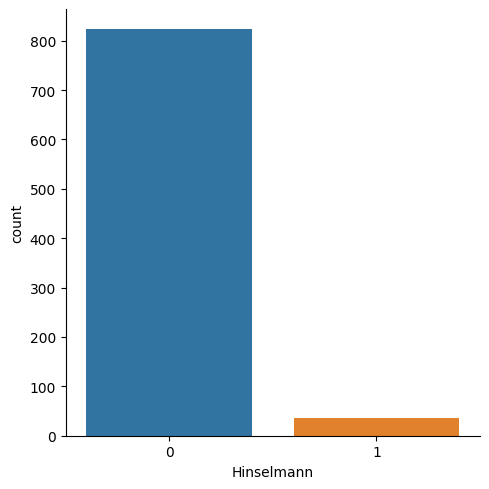

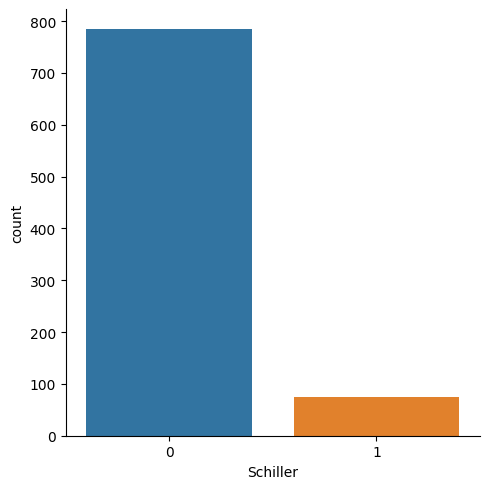

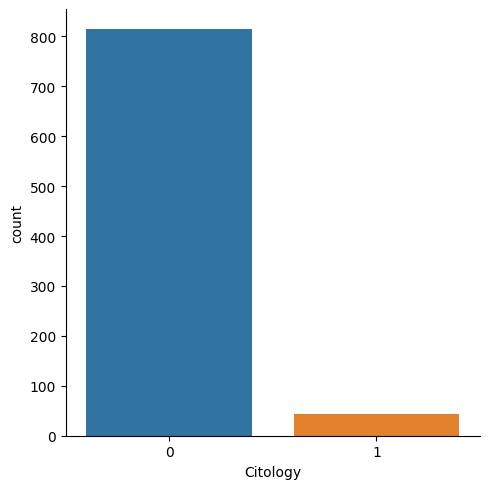

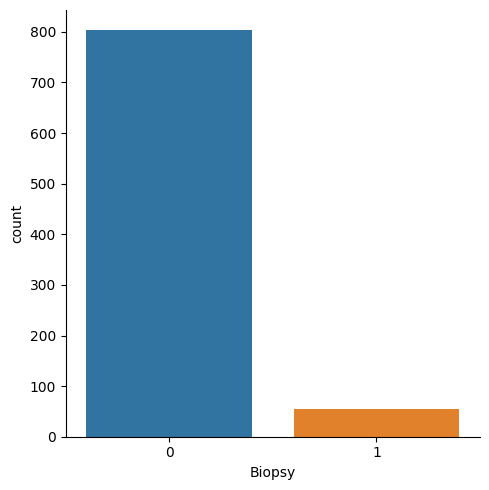

In [32]:
for feature in category_df:
    sns.catplot(x=feature, data=df, kind='count')

c:\Users\youse\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\youse\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\youse\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\youse\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprec

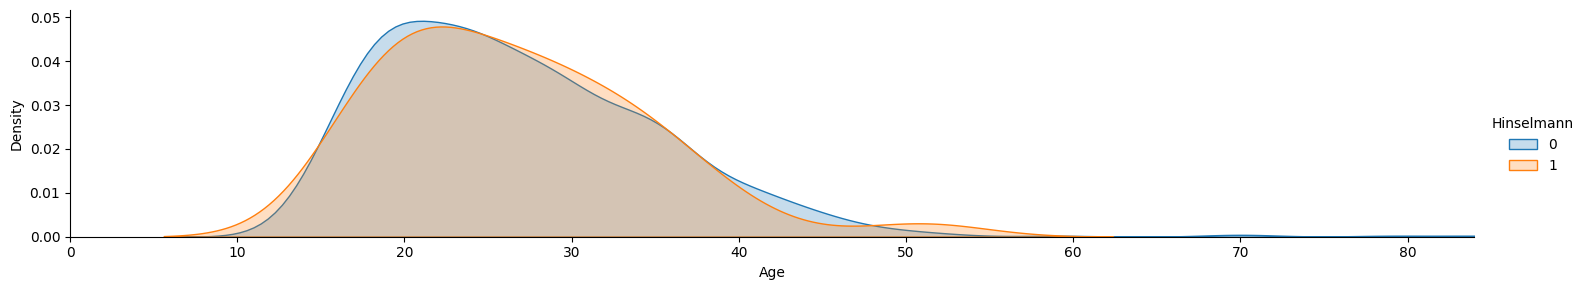

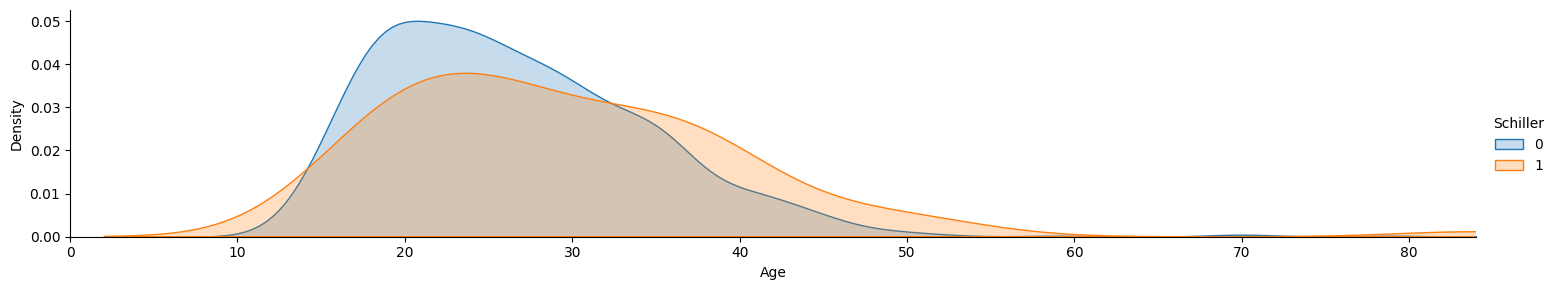

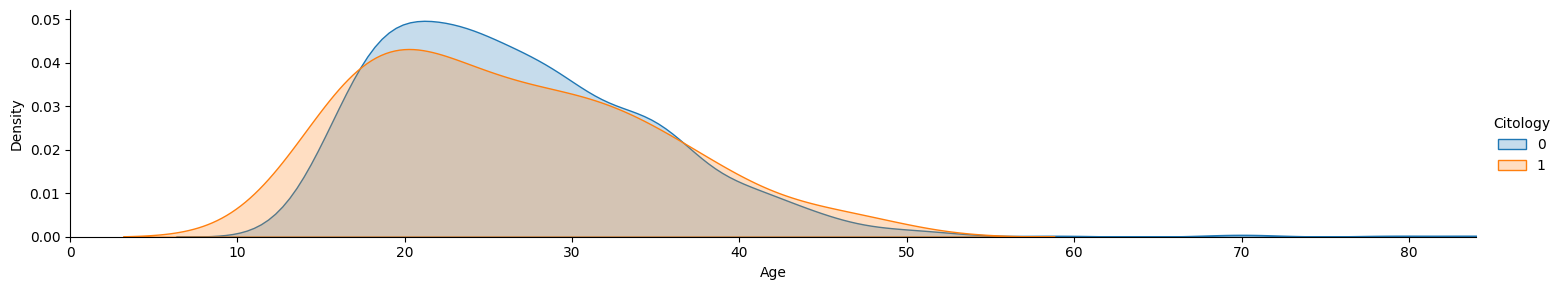

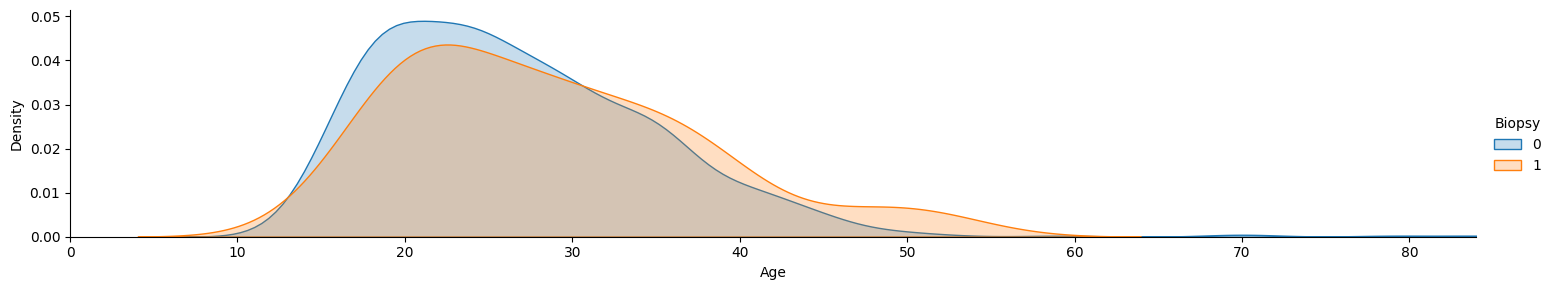

In [33]:
for feature in category_df:
    
    as_fig = sns.FacetGrid(df,hue=feature,aspect=5)
    as_fig.map(sns.kdeplot,'Age',shade=True)
    oldest = df['Age'].max()
    as_fig.set(xlim=(0,oldest))
    as_fig.add_legend()

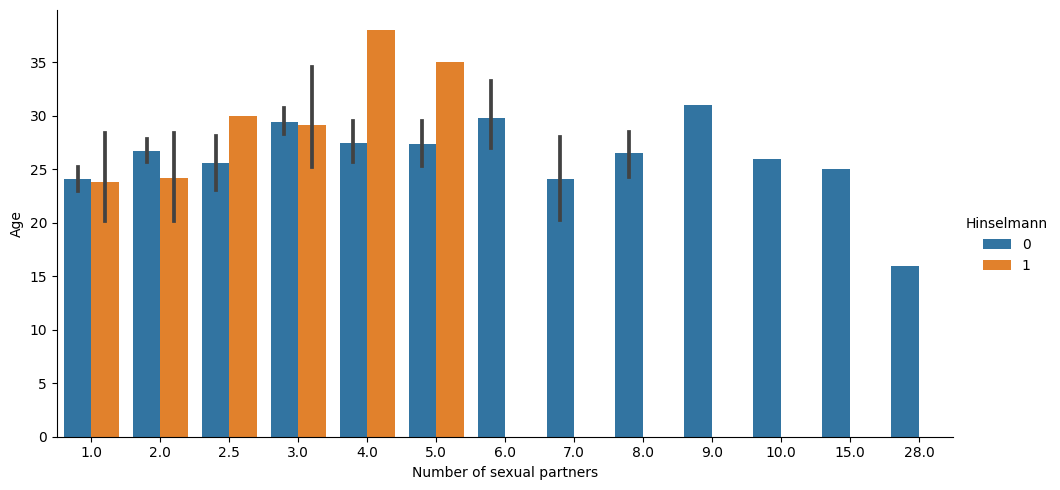

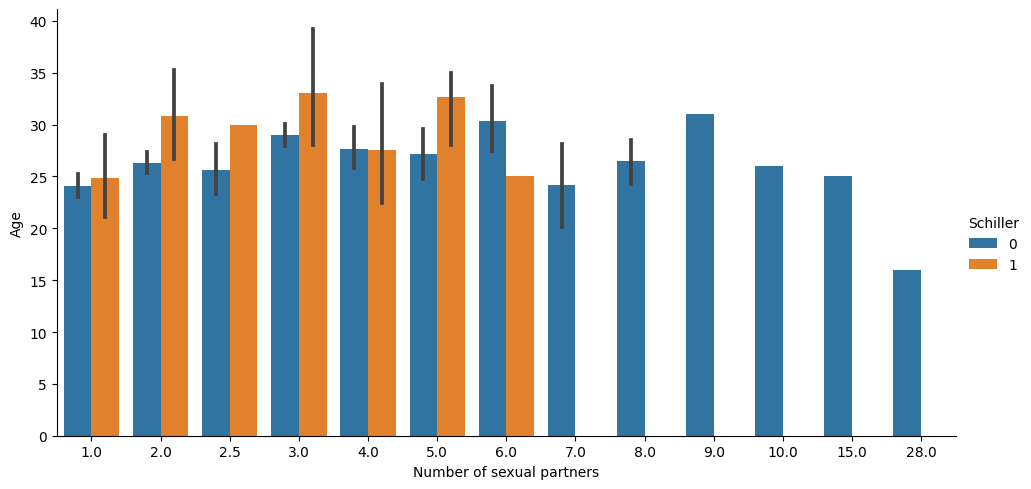

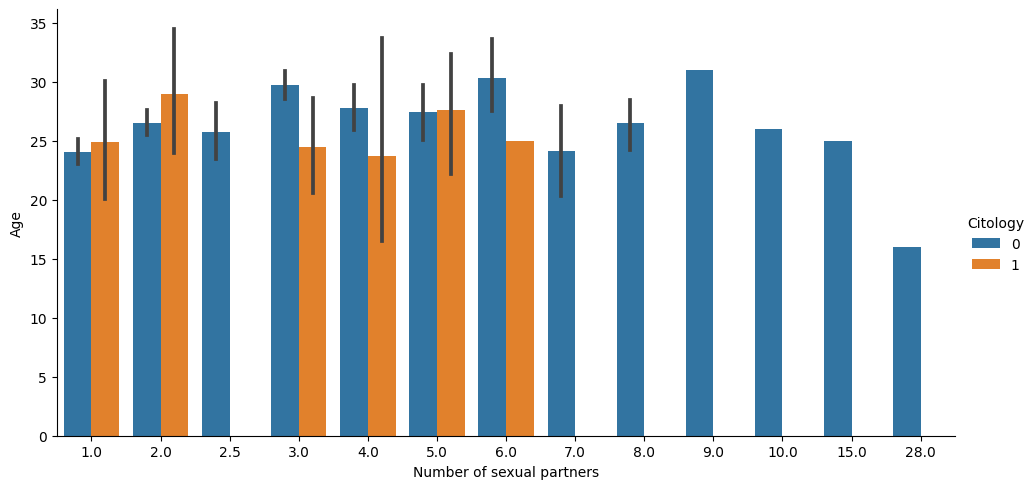

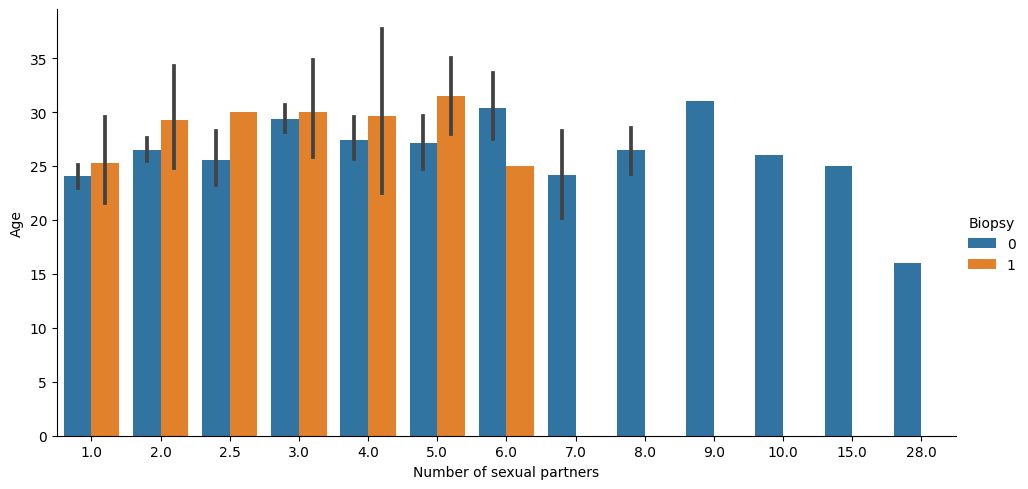

In [34]:
for feature in category_df:
      
  sns.catplot(x='Number of sexual partners',y='Age',hue=feature,data=df,aspect=1.95,kind='bar')

C:\Users\youse\AppData\Local\Temp\ipykernel_21312\2389850878.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['First sexual intercourse'])


<AxesSubplot: xlabel='First sexual intercourse', ylabel='Density'>

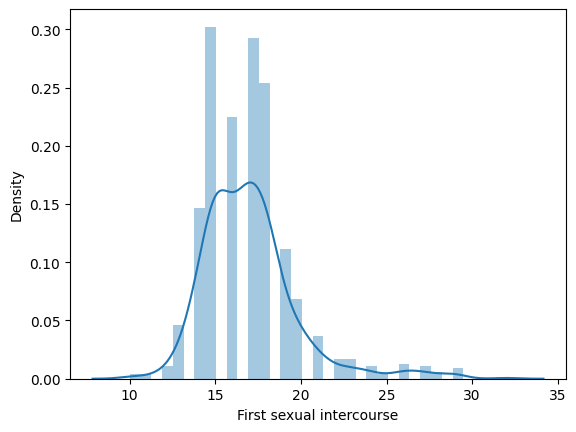

In [35]:
sns.distplot(df['First sexual intercourse'])

c:\Users\youse\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\youse\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\youse\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\youse\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprec

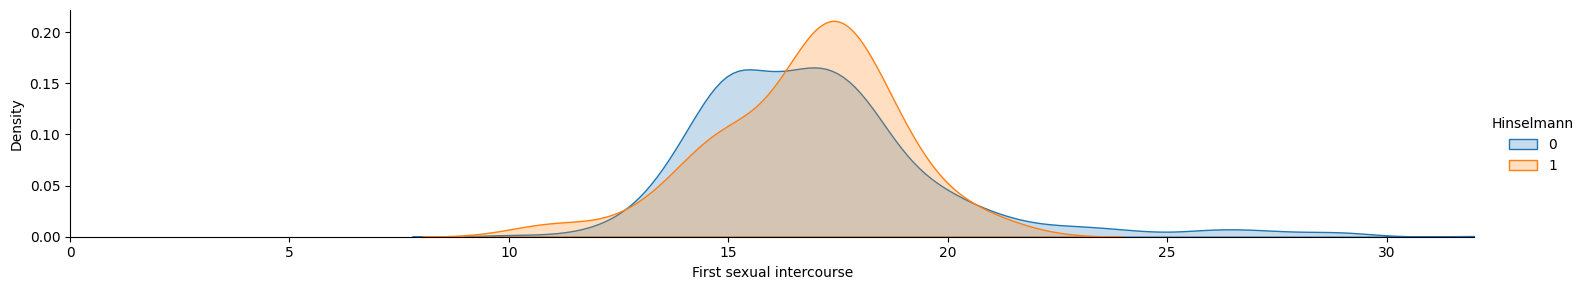

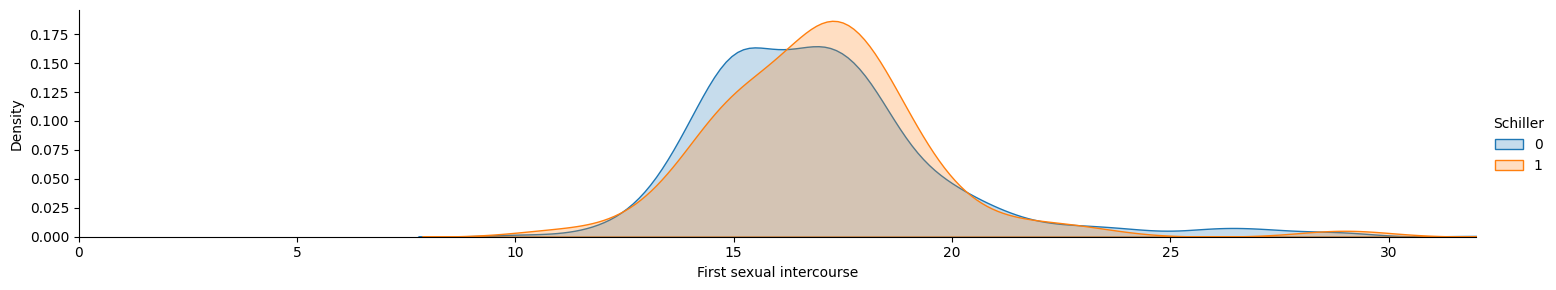

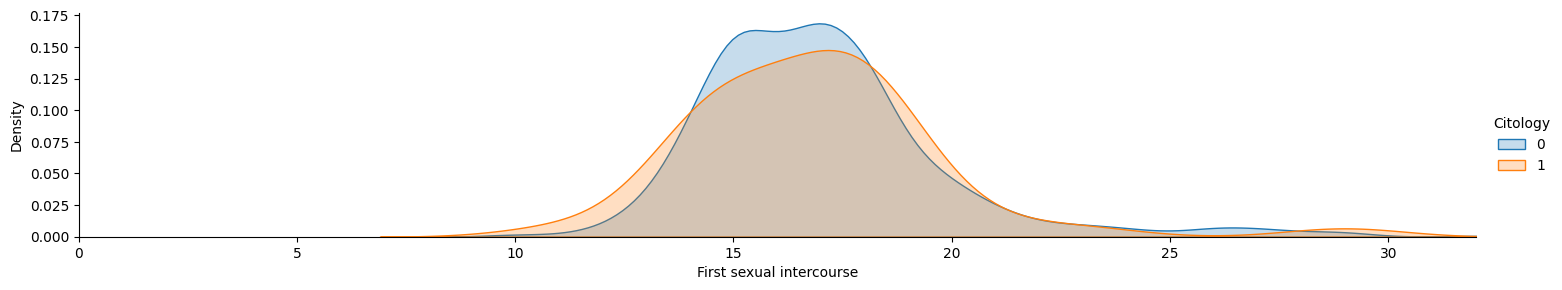

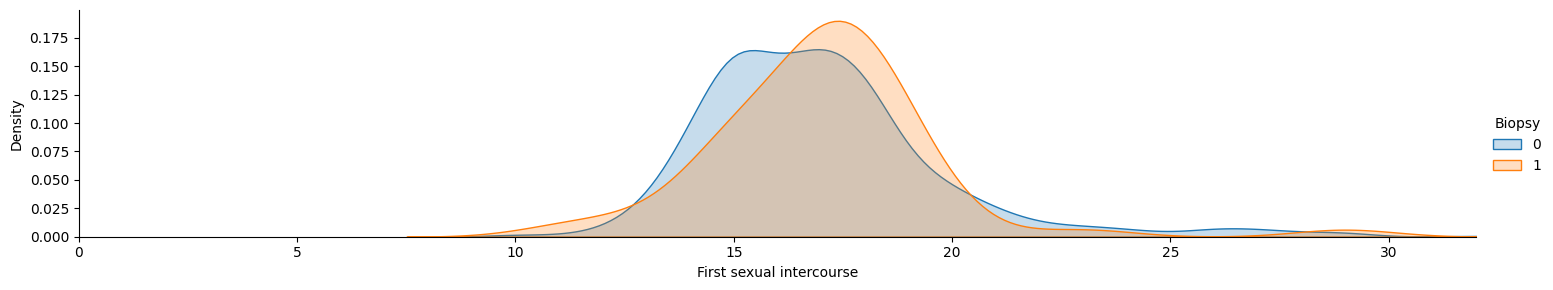

In [36]:
for feature in category_df:
    as_fig = sns.FacetGrid(df,hue=feature,aspect=5)
    as_fig.map(sns.kdeplot,'First sexual intercourse',shade=True)
    oldest = df['First sexual intercourse'].max()
    as_fig.set(xlim=(0,oldest))
    as_fig.add_legend()

In [42]:
import shap

# Fits the explainer
explainer_RF_Norm = shap.Explainer(RF_Norm.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values_RF_Norm = explainer_RF_Norm(X_test)


Permutation explainer: 403it [02:39,  2.51it/s]                         


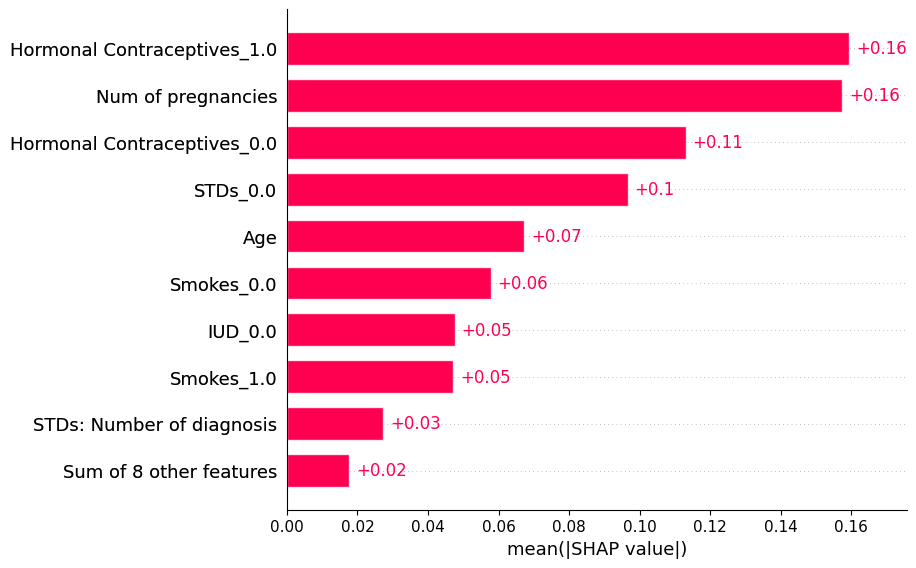

In [43]:
shap.plots.bar(shap_values_RF_Norm)# Base Model

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


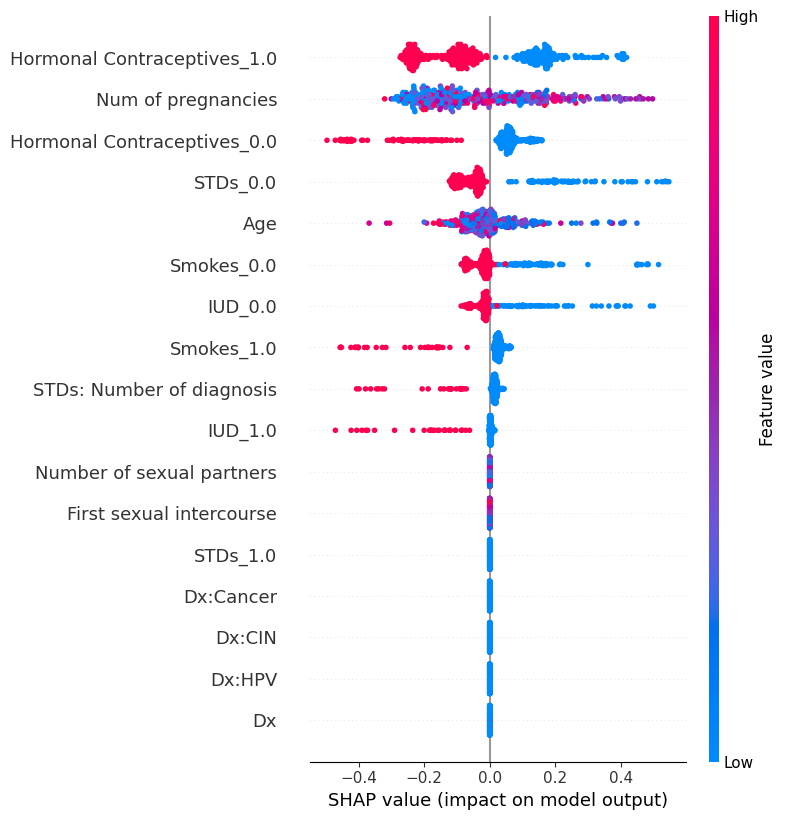

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


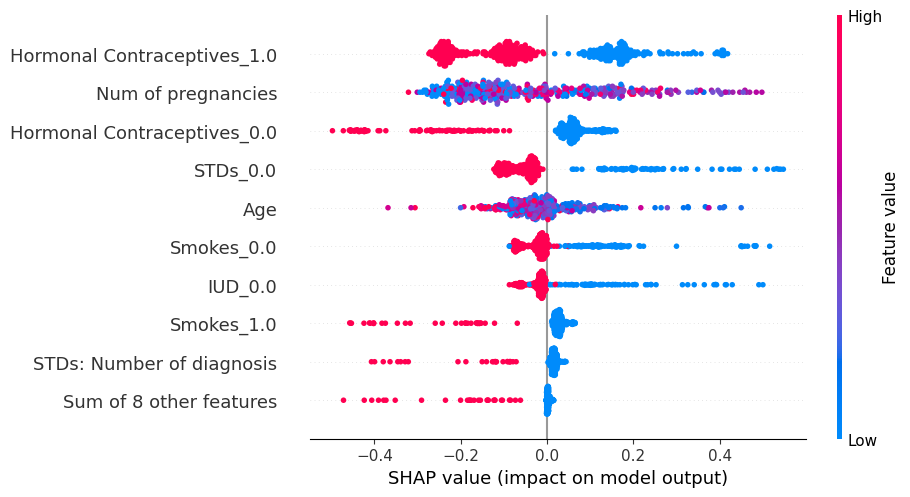

In [44]:
shap.summary_plot(shap_values_RF_Norm)
# or 
shap.plots.beeswarm(shap_values_RF_Norm)